### Idées à développer façe aux hypothèses du modèle PMCI
- <b>No contemporaneous effects : </b> à partir de quelle échelle ne considérons-nous plus de transmissions d'informations entre les actifs de manière instantanée. Départager selon la liquiditée

- <b>Stationarity : </b>

- <b></b>

In [55]:
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI

import sys
import matplotlib.pyplot as plt
import yaml
from src import utils
import numpy as np

### Données
Etude des log returns d'actifs sur l'échange binance 


In [56]:
config = yaml.safe_load(open("./config.yaml", "r"))
symbols = config['data']['symbols']
data = utils.preprocess(config)
prices = data[[f"{s}-close_price" for s in symbols]].copy()
data = prices.to_numpy()
data = np.log(data[1:]) - np.log(data[:-1])
data = np.nan_to_num(data)
datetime = prices.index.tolist()[1:]


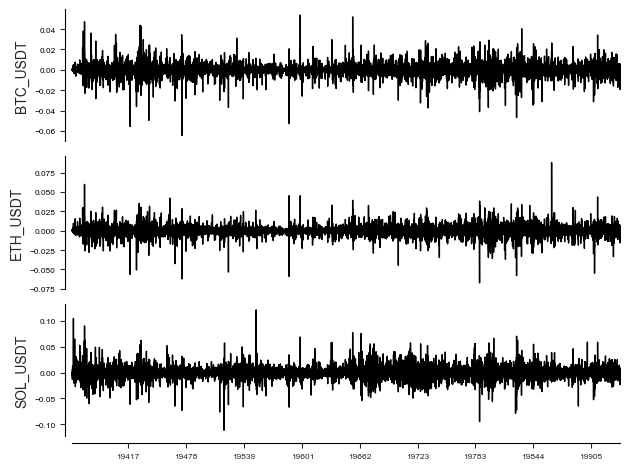

In [57]:
dataframe = pp.DataFrame(data, 
            datatime = datetime, 
            var_names=symbols)
tp.plot_timeseries(dataframe)
plt.show()


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


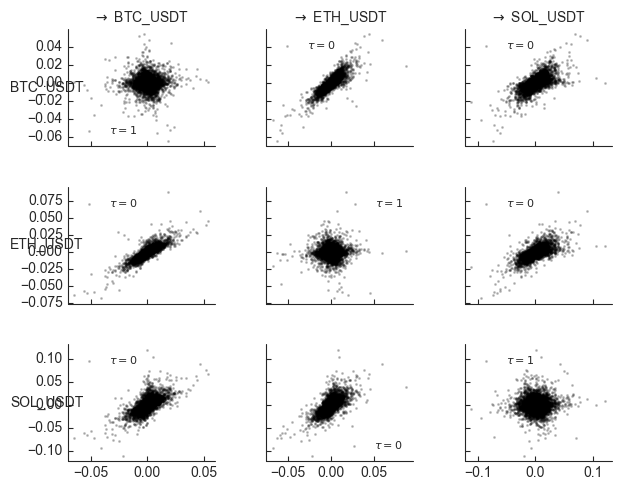

In [58]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':matrix_lags})
plt.show()

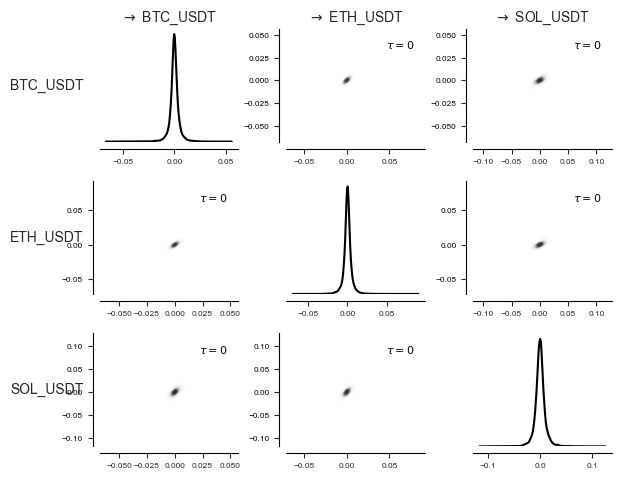

In [59]:
tp.plot_densityplots(dataframe=dataframe, add_densityplot_args={'matrix_lags':matrix_lags})
plt.show()


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


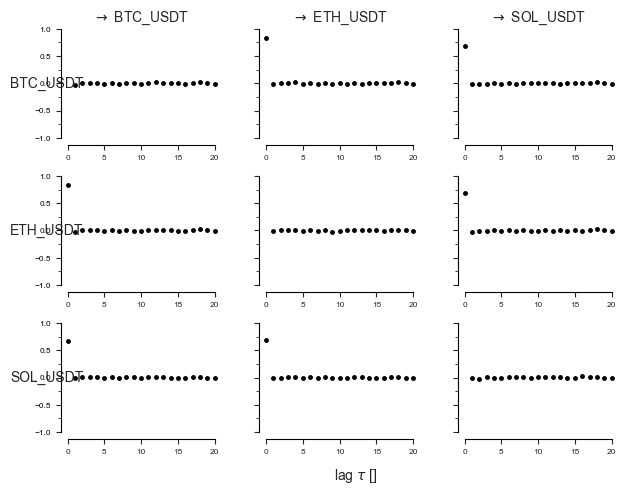

In [60]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)

correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':symbols, 
                                    'x_base':5, 'y_base':.5})
plt.show()

### models

In [67]:
tau_max = 6
alpha_level = 0.01
pc_alpha = None
verbosity = 0
cond_ind_test=CMIknn()

In [ ]:
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=cond_ind_test,
    verbosity=verbosity)
results = pcmci.run_pcmci(tau_max=tau_max, pc_alpha=pc_alpha, alpha_level=alpha_level)


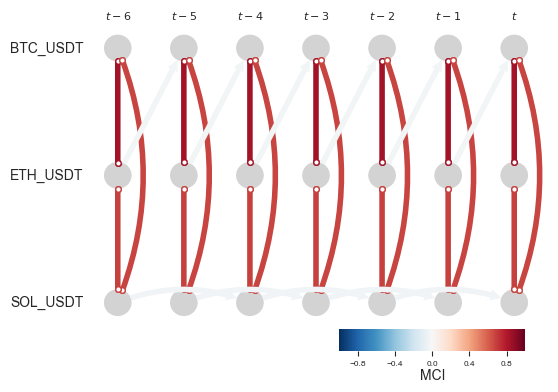

In [63]:
def plot_graph(results, symbols):
    tp.plot_time_series_graph(
        figsize=(6, 4),
        val_matrix=results['val_matrix'],
        graph=results['graph'],
        var_names=symbols,
        link_colorbar_label='MCI',
        )
    plt.show()

plot_graph(results, symbols)


## Significant links at alpha = 0.01:

    Variable BTC_USDT has 2 link(s):
        (ETH_USDT  0): pval = 0.00000 | val =  0.839
        (SOL_USDT  0): pval = 0.00000 | val =  0.675

    Variable ETH_USDT has 2 link(s):
        (BTC_USDT  0): pval = 0.00000 | val =  0.839
        (SOL_USDT  0): pval = 0.00000 | val =  0.684

    Variable SOL_USDT has 3 link(s):
        (ETH_USDT  0): pval = 0.00000 | val =  0.684
        (BTC_USDT  0): pval = 0.00000 | val =  0.675
        (SOL_USDT -2): pval = 0.00112 | val = -0.036


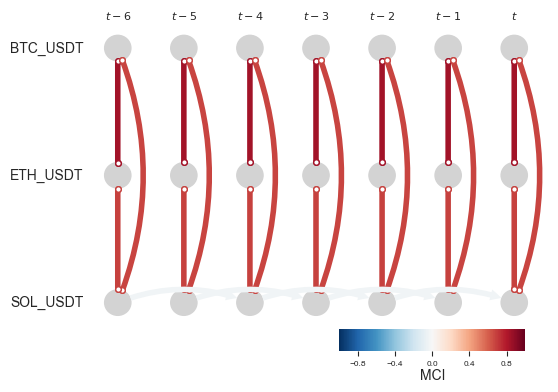

In [64]:
def false_discovery_rate_control(results, tau_max=1, alpha_level=0.01):
    q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], tau_max=tau_max, fdr_method='fdr_bh')
    pcmci.print_significant_links(
            p_matrix = q_matrix,
            val_matrix = results['val_matrix'],
            alpha_level = alpha_level)
    graph = pcmci.get_graph_from_pmatrix(p_matrix=q_matrix, alpha_level=alpha_level, 
                tau_min=0, tau_max=tau_max, link_assumptions=None)
    return graph
results['graph'] = false_discovery_rate_control(results,tau_max, alpha_level)
plot_graph(results, symbols)

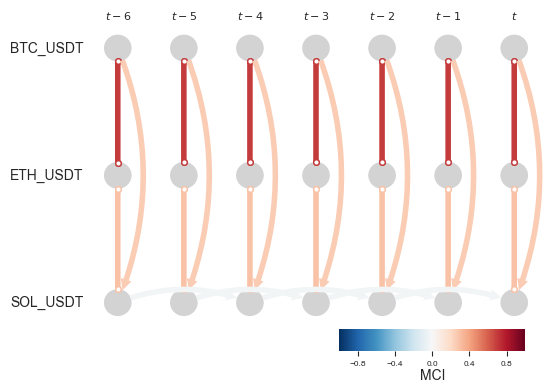

In [65]:
results = pcmci.run_pcmciplus(tau_max=tau_max, pc_alpha=pc_alpha)
plot_graph(results, symbols)


## Significant links at alpha = 0.01:

    Variable BTC_USDT has 2 link(s):
        (ETH_USDT  0): pval = 0.00000 | val =  0.700
        (SOL_USDT  0): pval = 0.00000 | val =  0.255

    Variable ETH_USDT has 2 link(s):
        (BTC_USDT  0): pval = 0.00000 | val =  0.700
        (SOL_USDT  0): pval = 0.00000 | val =  0.294

    Variable SOL_USDT has 2 link(s):
        (ETH_USDT  0): pval = 0.00000 | val =  0.294
        (BTC_USDT  0): pval = 0.00000 | val =  0.255


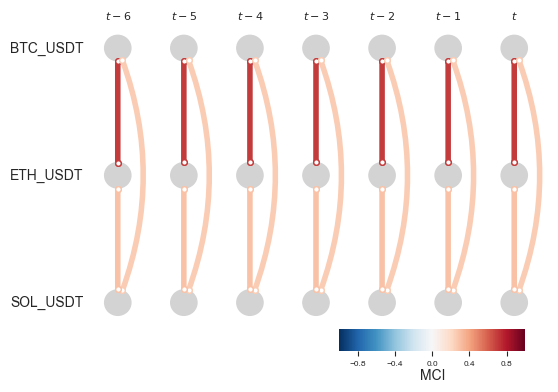

In [66]:
results['graph'] = false_discovery_rate_control(results,tau_max, alpha_level)
plot_graph(results, symbols)